# Data preparation

In [1]:
import warnings
# Ignoring future warnings and deprecation warnings so as not to make the notebook full of warnings
warnings.filterwarnings("ignore")

In [76]:
import pandas as pd
df = pd.read_csv('C:/Users/admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios.csv')
df.head()

Unnamed: 0    ratio  cash_cycle   net_profit  profit_growth_(%)  \
0           0  Q4 2016   34.669095  41294860102           0.949968   
1           1  Q1 2017   46.389765  66894667573           1.358928   
2           2  Q2 2017   40.549562  39129314217           0.162533   
3           3  Q3 2017   30.415510  52029043164           0.345329   
4           4  Q4 2017   21.999844  65289636792           0.581060   

        revenue  revenue_growth_(%)  market_capital    eps_(vnd)        p/e  \
0  6.676867e+11            0.451578    1.455455e+12   817.936153  10.250735   
1  7.335012e+11            0.728754    1.949325e+12  1303.709320   9.762348   
2  8.538257e+11            0.650835    1.970062e+12   733.182009   9.805468   
3  1.062929e+12            0.981942    2.399320e+12   948.578466   8.722134   
4  1.426508e+12            1.136493    3.344000e+12  1117.613576   7.486253   

   ...  current_ratio  asset_turnover  (st_+_lt_borrowings)/equity  \
0  ...       1.194128        0.241279                     1.867892   
1  ...       1.130836        0.231739                     1.767877   
2  ...       1.236766        0.259321                     1.562174   
3  ...       1.029980        0.296958                     1.682430   
4  ...       1.076307        0.341276                     1.463173   

   financial_leverage  roic_(%)  interest_coverage  fixed_asset_turnover  \
0            2.708550  0.098567           9.449727              0.622732   
1            2.951434  0.093826           3.586883              0.512996   
2            3.151398  0.103002           5.475838              0.573024   
3            3.382632  0.108061           5.658713              0.678384   
4            3.390346  0.110601           3.841977              0.739243   

   symbol  net_interest_income  net_interest_income_growth_(%)  
0     AAA                  NaN                             NaN  
1     AAA                  NaN                             NaN  
2     AAA                  NaN                             NaN  
3     AAA                  NaN                             NaN  
4     AAA                  NaN                             NaN  

[5 rows x 37 columns]

In [77]:
df.shape

(2072, 37)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2072 non-null   int64  
 1   ratio                           2072 non-null   object 
 2   cash_cycle                      1652 non-null   float64
 3   net_profit                      2072 non-null   int64  
 4   profit_growth_(%)               2072 non-null   float64
 5   revenue                         1652 non-null   float64
 6   revenue_growth_(%)              1652 non-null   float64
 7   market_capital                  2064 non-null   float64
 8   eps_(vnd)                       2064 non-null   float64
 9   p/e                             2064 non-null   float64
 10  p/b                             2064 non-null   float64
 11  p/s                             1652 non-null   float64
 12  p/cash_flow                     16

In [79]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0                           0
ratio                                0
cash_cycle                         420
net_profit                           0
profit_growth_(%)                    0
revenue                            420
revenue_growth_(%)                 420
market_capital                       8
eps_(vnd)                            8
p/e                                  8
p/b                                  8
p/s                                420
p/cash_flow                        420
outstanding_share                    8
ev/ebitda                          420
bvps_(vnd)                          21
cash_ratio                         430
dept/equity                        430
roe_(%)                             40
roa_(%)                             40
days_sales_outstanding             430
days_inventory_outstanding         430
quick_ratio                        430
days_payable_outstanding           430
gross_profit_margin_(%)            430
ebit_margin_(%)          

In [80]:
df = df.drop(['net_interest_income_growth_(%)', 
              'net_interest_income', 
              'fixed_asset_turnover', 
              'interest_coverage', 
              'financial_leverage',
              '(st_+_lt_borrowings)/equity',
              'asset_turnover',
              'current_ratio',
              'ebit_margin_(%)',
              'days_payable_outstanding',
              'quick_ratio',
              'days_inventory_outstanding',
              'days_sales_outstanding',
              'roa_(%)',
              'dept/equity',
              'cash_ratio',
              'bvps_(vnd)',
              'ev/ebitda',
              'p/cash_flow',
              'p/s',
              'p/b',
              'cash_cycle',
              'Unnamed: 0'
             ], axis=1)

In [81]:
df = df.drop(['roic_(%)',
              'net_profit_margin_(%)',
              'gross_profit_margin_(%)',
             ], axis=1)

In [82]:
df.head()

ratio   net_profit  profit_growth_(%)       revenue  revenue_growth_(%)  \
0  Q4 2016  41294860102           0.949968  6.676867e+11            0.451578   
1  Q1 2017  66894667573           1.358928  7.335012e+11            0.728754   
2  Q2 2017  39129314217           0.162533  8.538257e+11            0.650835   
3  Q3 2017  52029043164           0.345329  1.062929e+12            0.981942   
4  Q4 2017  65289636792           0.581060  1.426508e+12            1.136493   

   market_capital    eps_(vnd)        p/e  outstanding_share   roe_(%) symbol  
0    1.455455e+12   817.936153  10.250735         56964988.0  0.160569    AAA  
1    1.949325e+12  1303.709320   9.762348         59249988.0  0.195754    AAA  
2    1.970062e+12   733.182009   9.805468         59249988.0  0.193482    AAA  
3    2.399320e+12   948.578466   8.722134         83599988.0  0.200697    AAA  
4    3.344000e+12  1117.613576   7.486253        167199976.0  0.202759    AAA

In [83]:
rows_with_null_roe = df[df['roe_(%)'].isnull()]

rows_with_null_roe.head()

ratio    net_profit  profit_growth_(%)       revenue  \
96   Q4 2019  188306977799           3.685810  3.858591e+12   
111  Q3 2023   45340608112          -0.702948  2.876710e+12   
251  Q3 2023   21507940866           1.909974  7.611919e+11   
503  Q3 2023   55899296772          -0.133327  7.946423e+11   
839  Q3 2023   84402022043          -0.663910  4.596775e+11   

     revenue_growth_(%)  market_capital  eps_(vnd)        p/e  \
96             0.020681    1.201147e+12   1.885853   1.885853   
111           -0.143775    3.109507e+12  13.033860  13.033860   
251           -0.655439    5.444038e+12  65.234210  65.234210   
503           -0.181378    3.344486e+12  10.574263  10.574263   
839           -0.469203    8.469464e+12  12.624456  12.624456   

     outstanding_share  roe_(%) symbol  
96         258867849.0      NaN    ASM  
111        336526752.0      NaN    ASM  
251        318364813.0      NaN    CII  
503         80493048.0      NaN    DHC  
839        305756841.0      NaN    HDG

In [84]:
from scipy.stats import trim_mean
trimmed_mean_roe = trim_mean(df['roe_(%)'].dropna(), 0.1)

df['roe_(%)'].fillna(trimmed_mean_roe, inplace=True)

In [85]:
trimmed_mean_market_capital = trim_mean(df['market_capital'].dropna(), 0.1)
trimmed_mean_eps = trim_mean(df['eps_(vnd)'].dropna(), 0.1)
trimmed_mean_pe = trim_mean(df['p/e'].dropna(), 0.1)
trimmed_mean_outstanding_share = trim_mean(df['outstanding_share'].dropna(), 0.1)

df['market_capital'].fillna(trimmed_mean_market_capital, inplace=True)
df['eps_(vnd)'].fillna(trimmed_mean_eps, inplace=True)
df['p/e'].fillna(trimmed_mean_pe, inplace=True)
df['outstanding_share'].fillna(trimmed_mean_outstanding_share, inplace=True)

In [86]:
revenue_null_value = df[df['revenue'].isnull()]
revenue_null_value.head(5)

ratio    net_profit  profit_growth_(%)  revenue  revenue_growth_(%)  \
28  Q4 2016  328357000000           0.869021      NaN                 NaN   
29  Q1 2017  478166000000           0.541099      NaN                 NaN   
30  Q2 2017  501948000000           0.423082      NaN                 NaN   
31  Q3 2017  546797000000           0.637990      NaN                 NaN   
32  Q4 2017  591220000000           0.800540      NaN                 NaN   

    market_capital   eps_(vnd)        p/e  outstanding_share   roe_(%) symbol  
28    2.346445e+13  333.052615  16.840941       9.859013e+08  0.097654    ACB  
29    2.543625e+13  485.003934  17.036278       9.859013e+08  0.107158    ACB  
30    3.085871e+13  509.126024  18.790015       9.859013e+08  0.114789    ACB  
31    4.101349e+13  554.616380  22.106506       9.859013e+08  0.129728    ACB  
32    4.554864e+13  599.674644  20.370602       1.084491e+09  0.143182    ACB

In [87]:
df = df.dropna()

In [88]:
null_counts = df.isnull().sum()
null_counts

ratio                 0
net_profit            0
profit_growth_(%)     0
revenue               0
revenue_growth_(%)    0
market_capital        0
eps_(vnd)             0
p/e                   0
outstanding_share     0
roe_(%)               0
symbol                0
dtype: int64

In [89]:
df.head()

ratio   net_profit  profit_growth_(%)       revenue  revenue_growth_(%)  \
0  Q4 2016  41294860102           0.949968  6.676867e+11            0.451578   
1  Q1 2017  66894667573           1.358928  7.335012e+11            0.728754   
2  Q2 2017  39129314217           0.162533  8.538257e+11            0.650835   
3  Q3 2017  52029043164           0.345329  1.062929e+12            0.981942   
4  Q4 2017  65289636792           0.581060  1.426508e+12            1.136493   

   market_capital    eps_(vnd)        p/e  outstanding_share   roe_(%) symbol  
0    1.455455e+12   817.936153  10.250735         56964988.0  0.160569    AAA  
1    1.949325e+12  1303.709320   9.762348         59249988.0  0.195754    AAA  
2    1.970062e+12   733.182009   9.805468         59249988.0  0.193482    AAA  
3    2.399320e+12   948.578466   8.722134         83599988.0  0.200697    AAA  
4    3.344000e+12  1117.613576   7.486253        167199976.0  0.202759    AAA

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratio               1652 non-null   object 
 1   net_profit          1652 non-null   int64  
 2   profit_growth_(%)   1652 non-null   float64
 3   revenue             1652 non-null   float64
 4   revenue_growth_(%)  1652 non-null   float64
 5   market_capital      1652 non-null   float64
 6   eps_(vnd)           1652 non-null   float64
 7   p/e                 1652 non-null   float64
 8   outstanding_share   1652 non-null   float64
 9   roe_(%)             1652 non-null   float64
 10  symbol              1652 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 154.9+ KB


In [91]:
df.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios_cleaned.csv')

# Rule-based for medium and long-term trading

### Industry sector analysis

The Relative Strength (RS) indicator, often used in stock analysis, is a measure of a stock's or a sector's performance relative to a broader market index or another benchmark. The RS calculation is typically based on the ratio of the average returns (or price changes) of the stock or sector to the average returns of the market index over the same period.

1. Determine the Period of Analysis: 5/9/2022 - 31/8/2023

2. Calculate the Percentage Change: For each period in your chosen time frame, calculate the percentage change in price for both the stock (or sector) and the market index. The formula for percentage change is:
#### Percentage Change = [(Current Price − Previous Price)/Previous Price] ×100

3. Compute the Average Percentage Change: Calculate the average of these percentage changes over the entire period for both the stock (or sector) and the index.

4. Calculate RS: Divide the average percentage change of the stock (or sector) by the average percentage change of the market index. The formula is:

#### RS =  Average Percentage Change of Industry Sector / Average Percentage Change of Market Index
​
 


In [1]:
import pandas as pd
df_VNINDEX = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/Dữ liệu Lịch sử VN Index.csv')
df_VNINDEX.head()

Ngày  Lần cuối        Mở       Cao      Thấp       KL % Thay đổi
0  30/08/2023  1,213.16  1,206.10  1,213.52  1,203.51  911.99K      0.72%
1  29/08/2023  1,204.43  1,201.72  1,208.78  1,197.57  990.94K      0.23%
2  28/08/2023  1,201.72  1,183.37  1,202.02  1,183.37  882.85K      1.55%
3  25/08/2023  1,183.37  1,189.39  1,192.59  1,181.60  893.34K     -0.51%
4  24/08/2023  1,189.39  1,172.56  1,189.99  1,171.33  851.54K      1.44%

In [2]:
df_VNINDEX['Ngày'] = pd.to_datetime(df_VNINDEX['Ngày'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_7960\2147106538.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_VNINDEX['Ngày'] = pd.to_datetime(df_VNINDEX['Ngày'])


In [4]:
df_sorted = df_VNINDEX.sort_values(by='Ngày')
df_sorted

Ngày  Lần cuối        Mở       Cao      Thấp       KL % Thay đổi
248 2022-09-05  1,277.35  1,280.51  1,285.70  1,275.35  524.68K     -0.25%
247 2022-09-06  1,277.40  1,279.58  1,286.92  1,277.40  581.46K      0.00%
246 2022-09-07  1,243.17  1,277.40  1,277.40  1,243.17  852.27K     -2.68%
245 2022-09-08  1,234.60  1,243.17  1,251.36  1,234.60  599.61K     -0.69%
244 2022-09-09  1,248.78  1,234.60  1,248.78  1,228.54  586.03K      1.15%
..         ...       ...       ...       ...       ...      ...        ...
4   2023-08-24  1,189.39  1,172.56  1,189.99  1,171.33  851.54K      1.44%
3   2023-08-25  1,183.37  1,189.39  1,192.59  1,181.60  893.34K     -0.51%
2   2023-08-28  1,201.72  1,183.37  1,202.02  1,183.37  882.85K      1.55%
1   2023-08-29  1,204.43  1,201.72  1,208.78  1,197.57  990.94K      0.23%
0   2023-08-30  1,213.16  1,206.10  1,213.52  1,203.51  911.99K      0.72%

[249 rows x 7 columns]

In [5]:
df_sorted.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/Dữ liệu Lịch sử VN Index.csv')

In [24]:
df_industry_sector = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/Industry_sector_analysis.csv', encoding='ISO-8859-1')
df_industry_sector.head()

date         open         high          low        close symbol  \
0  9/5/2022  11.94999981          NaN  11.85000038  11.85000038    AAA   
1  9/6/2022  11.89999962  12.10000038  11.89999962  11.89999962    AAA   
2  9/7/2022  11.89999962  11.94999981  11.39999962  11.39999962    AAA   
3  9/8/2022  11.55000019  11.64999962  11.30000019  11.35000038    AAA   
4  9/9/2022  11.39999962         11.5  11.05000019  11.30000019    AAA   

  industry sector  
0        Hóa Ch?t  
1        Hóa Ch?t  
2        Hóa Ch?t  
3        Hóa Ch?t  
4        Hóa Ch?t

In [25]:
df_industry_sector = df_industry_sector.dropna()

In [26]:
df_industry_sector.isnull().sum()

date               0
open               0
high               0
low                0
close              0
symbol             0
industry sector    0
dtype: int64

In [27]:
unique_value = df_industry_sector['industry sector'].unique()
unique_value

array(['Hóa Ch?t', 'Ngân hàng', 'B?t ??ng s?n', 'S?n xu?t th?c ph?m',
       'D?ch v? tài chính', 'Xây d?ng và v?t li?u', 'B?o hi?m nhân th?',
       'N??c và khí ??t', 'Ph?n m?m d?ch v? máy tính', 'Hóa ch?t',
       'Bán l?', 'Lâm nghi?p và gi?y', 'Ph?n m?m và d?ch v? máy tính',
       'S?n xu?t và phân ph?i ?i?n', '?i?n t? và thi?t b? ?i?n',
       'V?n t?i', 'Kim lo?i', 'D??c ph?m', 'S?n xu?t d??c ph?m',
       'S?n xu?t d?u khí', 'Hàng cá nhân',
       'Thi?t b?, d?ch v? và phân ph?i d?u khí', 'Công nghi?p n?ng',
       'Bia và ?? u?ng', 'Thi?t b? và ph?n c?ng', 'Du l?ch và gi?i trí',
       'Ch? s? th? tr??ng chung'], dtype=object)

In [28]:
corrections = {
    'Hóa Ch?t': 'Hóa Chất',
    'Hóa ch?t': 'Hóa Chất',
    'B?t ??ng s?n': 'Bất Động Sản',
    'S?n xu?t th?c ph?m': 'Sản xuất thực phẩm',
    'D?ch v? tài chính': 'Dịch vụ tài chính',
    'Xây d?ng và v?t li?u': 'Xây dựng và vật liệu',
    'B?o hi?m nhân th?': 'Bảo hiểm nhân thọ',
    'N??c và khí ??t': 'Nước và khí đốt',
    'Ph?n m?m d?ch v? máy tính': 'Phần mềm dịch vụ máy tính',
    'Bán l?': 'Bán lẻ',
    'Lâm nghi?p và gi?y': 'Lâm nghiệp và giấy',
    'Ph?n m?m và d?ch v? máy tính': 'Phần mềm và dịch vụ máy tính',
    'S?n xu?t và phân ph?i ?i?n': 'Sản xuất và phân phối điện',
    '?i?n t? và thi?t b? ?i?n': 'Điện tử và thiết bị điện',
    'V?n t?i': 'Vận tải',
    'Kim lo?i': 'Kim loại',
    'D??c ph?m': 'Dược phẩm',
    'S?n xu?t d??c ph?m': 'Sản xuất dược phẩm',
    'S?n xu?t d?u khí': 'Sản xuất dầu khí',
    'Hàng cá nhân': 'Hàng cá nhân',
    'Thi?t b?, d?ch v? và phân ph?i d?u khí': 'Thiết bị, dịch vụ và phân phối dầu khí',
    'Công nghi?p n?ng': 'Công nghiệp nặng',
    'Bia và ?? u?ng': 'Bia và đồ uống',
    'Thi?t b? và ph?n c?ng': 'Thiết bị và phần cứng',
    'Du l?ch và gi?i trí': 'Du lịch và giải trí',
    'Ch? s? th? tr??ng chung': 'Chỉ số thị trường chung'
}

# Replace the values
df_industry_sector['industry sector'] = df_industry_sector['industry sector'].replace(corrections)

In [29]:
df_industry_sector = df_industry_sector.reset_index()

In [30]:
df_industry_sector = df_industry_sector.drop(['index'], axis=1)

In [31]:
df_industry_sector

date         open         high          low        close  \
0       9/6/2022  11.89999962  12.10000038  11.89999962  11.89999962   
1       9/7/2022  11.89999962  11.94999981  11.39999962  11.39999962   
2       9/8/2022  11.55000019  11.64999962  11.30000019  11.35000038   
3       9/9/2022  11.39999962         11.5  11.05000019  11.30000019   
4      9/12/2022  11.39999962  11.44999981  11.19999981  11.19999981   
...          ...          ...          ...          ...          ...   
21375  8/25/2023     1,189.39     1,192.59     1,181.60     1,183.37   
21376  8/28/2023     1,183.37     1,202.02     1,183.37     1,201.72   
21377  8/29/2023     1,201.72     1,208.78     1,197.57     1,204.43   
21378  8/30/2023     1,206.10     1,213.52     1,203.51     1,213.16   
21379  8/31/2023     1,204.10     1,211.52     1,201.51     1,210.16   

         symbol          industry sector  
0           AAA                 Hóa Chất  
1           AAA                 Hóa Chất  
2           AAA                 Hóa Chất  
3           AAA                 Hóa Chất  
4           AAA                 Hóa Chất  
...         ...                      ...  
21375  VN-Index  Chỉ số thị trường chung  
21376  VN-Index  Chỉ số thị trường chung  
21377  VN-Index  Chỉ số thị trường chung  
21378  VN-Index  Chỉ số thị trường chung  
21379  VN-Index  Chỉ số thị trường chung  

[21380 rows x 7 columns]

In [33]:
# Convert 'date' to datetime format
df_industry_sector['date'] = pd.to_datetime(df_industry_sector['date'])

# Convert 'close' to numeric, handling non-numeric values
# 'coerce' will set invalid parsing to NaN
df_industry_sector['close'] = pd.to_numeric(df_industry_sector['close'], errors='coerce')

# Drop rows where 'close' is NaN after conversion (if any)
df_industry_sector.dropna(subset=['close'], inplace=True)

# Separate VN-Index data
df_vn_index = df_industry_sector[df_industry_sector['symbol'] == 'VN-Index']

# Calculate percentage change for VN-Index
df_vn_index['vn_index_change'] = df_vn_index['close'].pct_change()

# Calculate percentage change for each stock
df_industry_sector['stock_price_change'] = df_industry_sector.groupby('symbol')['close'].pct_change()

# Merge VN-Index changes back into the main DataFrame
df_merged = df_industry_sector.merge(df_vn_index[['date', 'vn_index_change']], on='date', how='left')

# Group by industry sector and calculate the average of stock and VN-Index changes
grouped = df_merged.groupby('industry sector').agg({'stock_price_change': 'mean', 'vn_index_change': 'mean'})

# Calculate Relative Strength (RS)
grouped['RS'] = grouped['stock_price_change'] / grouped['vn_index_change']

# The 'RS' column now contains the Relative Strength of each industry sector
grouped['RS']

C:\Users\Admin\AppData\Local\Temp\ipykernel_7960\617387859.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vn_index['vn_index_change'] = df_vn_index['close'].pct_change()


industry sector
Bia và đồ uống                            -0.791082
Bán lẻ                                     1.367405
Bảo hiểm nhân thọ                          0.410294
Bất Động Sản                              -4.640208
Chỉ số thị trường chung                    1.000000
Công nghiệp nặng                          -4.862960
Du lịch và giải trí                       -0.326154
Dược phẩm                                  0.673972
Dịch vụ tài chính                         -7.169950
Hàng cá nhân                              -0.259298
Hóa Chất                                  -0.273563
Kim loại                                   0.759154
Lâm nghiệp và giấy                       -10.879573
Ngân hàng                                  1.882444
Nước và khí đốt                            1.469318
Phần mềm dịch vụ máy tính                  2.322306
Phần mềm và dịch vụ máy tính               2.092782
Sản xuất dược phẩm                         0.055374
Sản xuất dầu khí                           0.427

In [36]:
# Sort the sectors based on RS in descending order
ranked_sectors = grouped.sort_values(by='RS', ascending=False)

# Reset the index to make 'industry sector' a column again, if it's the index
ranked_sectors.reset_index(inplace=True)

# Add a ranking column that starts from 1
ranked_sectors['Ranking'] = ranked_sectors.reset_index(drop=False).index + 1

ranked_sectors

industry sector  stock_price_change  \
0                    Thiết bị và phần cứng           -0.001685   
1   Thiết bị, dịch vụ và phân phối dầu khí            0.001446   
2                Phần mềm dịch vụ máy tính            0.001247   
3             Phần mềm và dịch vụ máy tính            0.001304   
4                                Ngân hàng            0.000694   
5                                  Vận tải            0.000518   
6                          Nước và khí đốt           -0.000083   
7                                   Bán lẻ           -0.000346   
8                  Chỉ số thị trường chung            0.000119   
9                     Xây dựng và vật liệu            0.000636   
10                                Kim loại            0.000781   
11                               Dược phẩm            0.000736   
12                        Sản xuất dầu khí            0.000051   
13                       Bảo hiểm nhân thọ           -0.000892   
14                Điện tử và thiết bị điện            0.000845   
15                      Sản xuất dược phẩm            0.000089   
16              Sản xuất và phân phối điện           -0.000095   
17                            Hàng cá nhân           -0.000031   
18                                Hóa Chất           -0.000344   
19                     Du lịch và giải trí           -0.000806   
20                          Bia và đồ uống           -0.000490   
21                            Bất Động Sản           -0.000287   
22                      Sản xuất thực phẩm           -0.000459   
23                        Công nghiệp nặng           -0.000579   
24                       Dịch vụ tài chính            0.001508   
25                      Lâm nghiệp và giấy           -0.000209   

    vn_index_change         RS  Ranking  
0         -0.000059  28.795372        1  
1          0.000476   3.039476        2  
2          0.000537   2.322306        3  
3          0.000623   2.092782        4  
4          0.000369   1.882444        5  
5          0.000280   1.849879        6  
6         -0.000057   1.469318        7  
7         -0.000253   1.367405        8  
8          0.000119   1.000000        9  
9          0.000748   0.849964       10  
10         0.001029   0.759154       11  
11         0.001092   0.673972       12  
12         0.000119   0.427817       13  
13        -0.002174   0.410294       14  
14         0.002415   0.349794       15  
15         0.001614   0.055374       16  
16         0.000901  -0.105131       17  
17         0.000119  -0.259298       18  
18         0.001256  -0.273563       19  
19         0.002471  -0.326154       20  
20         0.000619  -0.791082       21  
21         0.000062  -4.640208       22  
22         0.000095  -4.827041       23  
23         0.000119  -4.862960       24  
24        -0.000210  -7.169950       25  
25         0.000019 -10.879573       26

### Fundamental Analysis Conditions

In [92]:
df['eps_growth(%)'] = ((df['eps_(vnd)'] - df.groupby('symbol')['eps_(vnd)'].shift(4)) / df.groupby('symbol')['eps_(vnd)'].shift(4)) * 100

In [93]:
df.isnull().sum()

ratio                   0
net_profit              0
profit_growth_(%)       0
revenue                 0
revenue_growth_(%)      0
market_capital          0
eps_(vnd)               0
p/e                     0
outstanding_share       0
roe_(%)                 0
symbol                  0
eps_growth(%)         236
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df['profit_growth_(%)'] *= 100
df['revenue_growth_(%)'] *= 100

In [96]:
df.head(5)

ratio   net_profit  profit_growth_(%)       revenue  revenue_growth_(%)  \
4  Q4 2017  65289636792          58.105964  1.426508e+12          113.649265   
5  Q1 2018  49238222361         -26.394399  1.298292e+12           76.999306   
6  Q2 2018  36613161825          -6.430351  2.321958e+12          171.947581   
7  Q3 2018  42906658795         -17.533254  2.188615e+12          105.904117   
8  Q4 2018  51502432019         -21.116988  2.209962e+12           54.921154   

   market_capital    eps_(vnd)        p/e  outstanding_share   roe_(%) symbol  \
4    3.344000e+12  1117.613576   7.486253        167199976.0  0.202759    AAA   
5    2.909280e+12   818.576739   7.793048        167199976.0  0.176100    AAA   
6    2.431040e+12   427.625124   6.487935        171199976.0  0.132877    AAA   
7    2.448160e+12   463.772282   8.852480        171199976.0  0.102177    AAA   
8    3.167200e+12   428.736427  17.570128        171199976.0  0.081931    AAA   

   eps_growth(%)  
4      36.638242  
5     -37.211714  
6     -41.675448  
7     -51.108706  
8     -61.638223

In [97]:
df.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios_cleaned.csv')

In [98]:
df_fundamental = df[['ratio','net_profit', 'profit_growth_(%)', 'revenue', 'revenue_growth_(%)','eps_(vnd)', 'eps_growth(%)', 'roe_(%)', 'symbol']]
df_fundamental

ratio    net_profit  profit_growth_(%)       revenue  \
4     Q4 2017   65289636792          58.105964  1.426508e+12   
5     Q1 2018   49238222361         -26.394399  1.298292e+12   
6     Q2 2018   36613161825          -6.430351  2.321958e+12   
7     Q3 2018   42906658795         -17.533254  2.188615e+12   
8     Q4 2018   51502432019         -21.116988  2.209962e+12   
...       ...           ...                ...           ...   
2067  Q3 2022  220666896949         624.692618  6.521616e+11   
2068  Q4 2022  382126600956          98.261279  9.628110e+11   
2069  Q1 2023  476648446226          18.025005  8.921769e+11   
2070  Q2 2023  261808202789           1.863037  6.572797e+11   
2071  Q3 2023   25597855964         -88.399775  3.821421e+11   

      revenue_growth_(%)    eps_(vnd)  eps_growth(%)   roe_(%) symbol  
4             113.649265  1117.613576      36.638242  0.202759    AAA  
5              76.999306   818.576739     -37.211714  0.176100    AAA  
6             171.947581   427.625124     -41.675448  0.132877    AAA  
7             105.904117   463.772282     -51.108706  0.102177    AAA  
8              54.921154   428.736427     -61.638223  0.081931    AAA  
...                  ...          ...            ...       ...    ...  
2067          126.295284   931.039774    -590.378907  0.245687    VSH  
2068           51.806880  1612.272023      98.121861  0.273152    VSH  
2069           10.340465  2011.079450      18.025005  0.272947    VSH  
2070           -0.577388  1104.623545       1.863037  0.265446    VSH  
2071          -41.403773   108.354728     -88.361966  0.222108    VSH  

[1416 rows x 9 columns]

In [99]:
# The most recent quarter's EPS growth is greater than 15% compared to the same quarter of the previous year
def check_eps_growth_1stcondition(df_fundamental, latest_quarter, growth_threshold):
    # Filter DataFrame for the latest quarter
    latest_quarter_df = df_fundamental[df_fundamental['ratio'] == latest_quarter]
    # Check if the EPS growth is greater than the specified threshold
    latest_quarter_df['condition_met'] = latest_quarter_df['eps_growth(%)'] > growth_threshold
    return latest_quarter_df[['symbol', 'eps_growth(%)', 'condition_met']]

result_1st = check_eps_growth_1stcondition(df_fundamental, 'Q3 2023', 15)

result_1st.head()

symbol  eps_growth(%)  condition_met
27     AAA      10.483045          False
83     ANV     -99.156585          False
111    ASM     -97.126325          False
139    BCG     -81.370683          False
195    BMP      19.215057           True

In [100]:
# EPS growth for the two most recent quarters is greater than 15% compared to the same quarters of the previous year
def check_eps_growth_2ndcondition(df_fundamental, recent_quarters, growth_threshold):
    # Filter DataFrame for the recent quarters
    recent_quarter_df = df_fundamental[df_fundamental['ratio'].isin(recent_quarters)]

    # Group by stock symbol and check if EPS growth is greater than the threshold for all recent quarters
    result = recent_quarter_df.groupby('symbol').apply(
        lambda x: (x['eps_growth(%)'] > growth_threshold).all()
    )

    return result

recent_2nd = ['Q3 2023', 'Q2 2023']
result_2nd = check_eps_growth_2ndcondition(df_fundamental, recent_quarters, 15)

result_2nd.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP     True
dtype: bool

In [101]:
# Earnings Per Share (EPS) in each quarter of the last 12 months is at or near its peak
def assess_eps_near_peak_3rdcondition(df_fundamental, year):
    # Filter DataFrame for the specified year
    year_df = df_fundamental[df_fundamental['ratio'].str.contains(year)]

    # Function to check if EPS is at or near peak for each stock
    def is_eps_at_peak(stock_df):
        # Track the maximum EPS value encountered
        max_eps = 0
        for eps in stock_df['eps_(vnd)']:
            # Define "near peak" criteria (e.g., within 5% of the max)
            near_peak = max_eps * 0.95
            if eps < near_peak:
                return False
            max_eps = max(max_eps, eps)
        return True

    # Group by stock symbol and apply the check
    result = year_df.groupby('symbol').apply(is_eps_at_peak)
    
    return result

result_3rd = assess_eps_near_peak_3rdcondition(df, '2023')

result_3rd.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [103]:
# Most recent quarter's revenue is greater than 20% compared to the same quarter of the previous year
def check_revenue_growth_4thcondition(df_fundamental, latest_quarter, growth_threshold):
    # Filter DataFrame for the latest quarter
    latest_quarter_df = df_fundamental[df_fundamental['ratio'] == latest_quarter]

    # Check if the revenue growth is greater than the specified threshold
    latest_quarter_df['condition_met'] = latest_quarter_df['revenue_growth_(%)'] > growth_threshold

    # Return the DataFrame with an additional column indicating if the condition is met
    return latest_quarter_df[['symbol', 'revenue_growth_(%)', 'condition_met']]

result_4th = check_revenue_growth_4thcondition(df_fundamental, 'Q3 2023', 20)

result_4th.head()

symbol  revenue_growth_(%)  condition_met
27     AAA            7.290048          False
83     ANV          -11.797869          False
111    ASM          -14.377499          False
139    BCG          -11.671474          False
195    BMP          -37.554390          False

In [104]:
# Accelerating revenue growth over the last three quarters
def check_accelerating_revenue_growth_5thcondition(df_fundamental, quarters):
    # Filter DataFrame for the specified quarters
    filtered_df = df_fundamental[df_fundamental['ratio'].isin(quarters)]

    # Function to check if revenue growth is accelerating for each stock
    def is_growth_accelerating(stock_df):
        # Ensure the DataFrame is sorted by quarter
        stock_df = stock_df.sort_values(by='ratio')
        growth_rates = stock_df['revenue_growth_(%)'].tolist()

        # Check if each subsequent growth rate is greater than the previous
        return all(x < y for x, y in zip(growth_rates, growth_rates[1:]))

    # Group by stock symbol and apply the check
    result = filtered_df.groupby('symbol').apply(is_growth_accelerating)

    return result

relevant_quarters = ['Q1 2023', 'Q2 2023', 'Q3 2023']
result_5th = check_accelerating_revenue_growth_5thcondition(df_fundamental, relevant_quarters)

result_5th.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [105]:
# Accelerating profit growth over the last three quarters
def check_accelerating_profit_growth_6thcondition(df_fundamental, quarters):
    # Filter DataFrame for the specified quarters
    filtered_df = df_fundamental[df_fundamental['ratio'].isin(quarters)]

    # Function to check if revenue growth is accelerating for each stock
    def is_growth_accelerating(stock_df):
        # Ensure the DataFrame is sorted by quarter
        stock_df = stock_df.sort_values(by='ratio')
        growth_rates = stock_df['profit_growth_(%)'].tolist()

        # Check if each subsequent growth rate is greater than the previous
        return all(x < y for x, y in zip(growth_rates, growth_rates[1:]))

    # Group by stock symbol and apply the check
    result = filtered_df.groupby('symbol').apply(is_growth_accelerating)

    return result

relevant_quarters = ['Q1 2023', 'Q2 2023', 'Q3 2023']
result_6th = check_accelerating_profit_growth_6thcondition(df_fundamental, relevant_quarters)

result_6th.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [106]:
def check_roe_7thcondition(df_fundamental, current_quarter, roe_threshold):
    # Filter DataFrame for the current quarter
    current_quarter_df = df_fundamental[df_fundamental['ratio'] == current_quarter]

    # Check if the ROE is at least the specified threshold
    current_quarter_df['condition_met'] = current_quarter_df['roe_(%)'] >= roe_threshold

    # Return the DataFrame with an additional column indicating if the condition is met
    return current_quarter_df[['symbol', 'roe_(%)', 'condition_met']]

result_7th = check_roe_7thcondition(df_fundamental, 'Q3 2023', 15)

result_7th.head()

symbol   roe_(%)  condition_met
27     AAA  0.017459          False
83     ANV  0.050116          False
111    ASM  0.154016          False
139    BCG -0.009286          False
195    BMP  0.367252          False

### Technical Analysis Conditions

In [107]:
df_technical = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_price.csv')
df_technical.head()

date   open   high    low  close   volume symbol
0  1/3/2017  12.50  12.95  12.50  12.81   694080    AAA
1  1/4/2017  13.13  13.23  12.76  12.97   740770    AAA
2  1/5/2017  13.02  13.23  12.42  13.23  1057020    AAA
3  1/6/2017  13.02  13.05  12.50  12.76   823010    AAA
4  1/9/2017  12.76  13.65  12.55  13.54   777440    AAA

In [108]:
df_technical['date'] = pd.to_datetime(df_technical['date'])

In [109]:
df_technical.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
symbol            object
dtype: object

In [110]:
# Calculate EMA34-89 for each stock
df_technical['EMA34'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.ewm(span=34, adjust=False).mean())
df_technical['EMA89'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.ewm(span=89, adjust=False).mean())
df_technical.head()

date   open   high    low  close   volume symbol      EMA34      EMA89
0 2017-01-03  12.50  12.95  12.50  12.81   694080    AAA  12.810000  12.810000
1 2017-01-04  13.13  13.23  12.76  12.97   740770    AAA  12.819143  12.813556
2 2017-01-05  13.02  13.23  12.42  13.23  1057020    AAA  12.842620  12.822810
3 2017-01-06  13.02  13.05  12.50  12.76   823010    AAA  12.837899  12.821414
4 2017-01-09  12.76  13.65  12.55  13.54   777440    AAA  12.878019  12.837383

In [111]:
# Calculate MA5-20-50-150-200 for each stock
df_technical['MA5'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=5).mean())
df_technical['MA20'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
df_technical['MA50'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=50).mean())
df_technical['MA150'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=150).mean())
df_technical['MA200'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=200).mean())
df_technical.head()

date   open   high    low  close   volume symbol      EMA34  \
0 2017-01-03  12.50  12.95  12.50  12.81   694080    AAA  12.810000   
1 2017-01-04  13.13  13.23  12.76  12.97   740770    AAA  12.819143   
2 2017-01-05  13.02  13.23  12.42  13.23  1057020    AAA  12.842620   
3 2017-01-06  13.02  13.05  12.50  12.76   823010    AAA  12.837899   
4 2017-01-09  12.76  13.65  12.55  13.54   777440    AAA  12.878019   

       EMA89     MA5  MA20  MA50  MA150  MA200  
0  12.810000     NaN   NaN   NaN    NaN    NaN  
1  12.813556     NaN   NaN   NaN    NaN    NaN  
2  12.822810     NaN   NaN   NaN    NaN    NaN  
3  12.821414     NaN   NaN   NaN    NaN    NaN  
4  12.837383  13.062   NaN   NaN    NaN    NaN

In [112]:
df_technical = df_technical.dropna()
df_technical.head()

date   open   high    low  close   volume symbol      EMA34  \
199 2017-10-20  20.03  20.18  19.63  19.66  1790670    AAA  19.725192   
200 2017-10-23  19.66  19.66  19.19  19.25  1497490    AAA  19.698038   
201 2017-10-24  19.25  19.42  19.22  19.39   772490    AAA  19.680436   
202 2017-10-25  19.39  19.60  19.39  19.57   355630    AAA  19.674125   
203 2017-10-26  19.54  19.57  19.14  19.22   754900    AAA  19.648175   

         EMA89     MA5     MA20     MA50      MA150     MA200  
199  18.755320  20.062  19.9255  19.5004  17.419200  16.31395  
200  18.766313  19.900  19.8735  19.5188  17.460000  16.34615  
201  18.780173  19.702  19.8400  19.5204  17.501733  16.37825  
202  18.797725  19.580  19.8155  19.5290  17.544667  16.40995  
203  18.807109  19.418  19.7950  19.5220  17.585800  16.44225

In [113]:
df_technical.shape

(137083, 14)

In [114]:
df_technical = df_technical.reset_index()

In [115]:
df_technical = df_technical.drop(['index'], axis=1)

In [116]:
df_technical

date   open   high    low  close   volume symbol      EMA34  \
0      2017-10-20  20.03  20.18  19.63  19.66  1790670    AAA  19.725192   
1      2017-10-23  19.66  19.66  19.19  19.25  1497490    AAA  19.698038   
2      2017-10-24  19.25  19.42  19.22  19.39   772490    AAA  19.680436   
3      2017-10-25  19.39  19.60  19.39  19.57   355630    AAA  19.674125   
4      2017-10-26  19.54  19.57  19.14  19.22   754900    AAA  19.648175   
...           ...    ...    ...    ...    ...      ...    ...        ...   
137078 2023-09-25  43.40  43.50  41.70  42.80   130200    VSH  44.093003   
137079 2023-09-26  43.95  43.95  43.00  43.30    83200    VSH  44.047688   
137080 2023-09-27  42.50  43.60  42.50  43.00    20600    VSH  43.987820   
137081 2023-09-28  43.00  43.90  43.00  43.50     4500    VSH  43.959945   
137082 2023-09-29  43.60  43.65  43.50  43.50     1400    VSH  43.933662   

            EMA89     MA5     MA20     MA50      MA150     MA200  
0       18.755320  20.062  19.9255  19.5004  17.419200  16.31395  
1       18.766313  19.900  19.8735  19.5188  17.460000  16.34615  
2       18.780173  19.702  19.8400  19.5204  17.501733  16.37825  
3       18.797725  19.580  19.8155  19.5290  17.544667  16.40995  
4       18.807109  19.418  19.7950  19.5220  17.585800  16.44225  
...           ...     ...      ...      ...        ...       ...  
137078  42.948250  42.760  44.0425  44.7900  40.751933  38.44715  
137079  42.956067  42.820  43.9225  44.7610  40.800267  38.51500  
137080  42.957043  42.900  43.8075  44.7310  40.849133  38.58460  
137081  42.969109  43.100  43.7175  44.7210  40.900667  38.65810  
137082  42.980907  43.220  43.6025  44.7090  40.950333  38.72695  

[137083 rows x 14 columns]

In [117]:
def check_emacross_8thcondition(df_technical):
    df_technical['EMA_Condition_Met'] = df_technical['EMA34'] > df_technical['EMA89']
    condition_met_by_stock = df_technical.groupby('symbol')['EMA_Condition_Met'].any()

    return condition_met_by_stock
result_8th = check_emacross_8thcondition(df_technical)
result_8th.head()

symbol
AAA    True
ACB    True
AGG    True
ANV    True
ASM    True
Name: EMA_Condition_Met, dtype: bool

In [118]:
def check_ma_9thcondition(df_technical):
    df_technical['MA_Condition_Met'] = (df_technical['MA50'] > df_technical['MA150']) & (df_technical['MA150'] > df_technical['MA200'])
    condition_met_by_stock = df_technical.groupby('symbol')['MA_Condition_Met'].any()
    return condition_met_by_stock
result_9th = check_ma_9thcondition(df_technical)
result_9th.head()

symbol
AAA    True
ACB    True
AGG    True
ANV    True
ASM    True
Name: MA_Condition_Met, dtype: bool

In [119]:
df_technical.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_price_cleaned.csv')

### Conditions Evaluation

In [120]:
def evaluate_and_rank_stocks(df_fundamental, df_technical):
    latest_quarter = 'Q3 2023'
    recent_two_quarters = ['Q3 2023', 'Q2 2023']
    recent_three_quarters = ['Q3 2023', 'Q2 2023', 'Q1 2023']
    year = '2023'

    condition_1 = check_eps_growth_1stcondition(df_fundamental, latest_quarter, 15)['condition_met']
    condition_2 = check_eps_growth_2ndcondition(df_fundamental, recent_two_quarters, 15)
    condition_3 = assess_eps_near_peak_3rdcondition(df_fundamental, year)
    condition_4 = check_revenue_growth_4thcondition(df_fundamental, latest_quarter, 20)['condition_met']
    condition_5 = check_accelerating_revenue_growth_5thcondition(df_fundamental, recent_three_quarters)
    condition_6 = check_accelerating_profit_growth_6thcondition(df_fundamental, recent_three_quarters)
    condition_7 = check_roe_7thcondition(df_fundamental, latest_quarter, 15)['condition_met']
    condition_8 = check_emacross_8thcondition(df_technical)
    condition_9 = check_ma_9thcondition(df_technical)

    combined = pd.DataFrame({
        'Condition 1': condition_1,
        'Condition 2': condition_2,
        'Condition 3': condition_3,
        'Condition 4': condition_4,
        'Condition 5': condition_5,
        'Condition 6': condition_6,
        'Condition 7': condition_7,
        'Condition 8': condition_8,
        'Condition 9': condition_9
    })

    combined['Total Conditions Met'] = combined.sum(axis=1)

    ranked_stocks = combined.sort_values(by='Total Conditions Met', ascending=False)

    return ranked_stocks

ranked_stocks = evaluate_and_rank_stocks(df_fundamental, df_technical)

In [121]:
ranked_stocks['Ranking'] = ranked_stocks['Total Conditions Met'].rank(ascending=False, method='first').astype(int)
ranked_stocks.head(10)

Condition 1 Condition 2 Condition 3 Condition 4 Condition 5 Condition 6  \
SSI         NaN        True        True         NaN        True        True   
HPG         NaN       False        True         NaN        True        True   
SJS         NaN        True       False         NaN        True        True   
VND         NaN       False        True         NaN        True        True   
VNM         NaN       False        True         NaN       False        True   
VGC         NaN       False       False         NaN        True        True   
HCM         NaN       False        True         NaN       False        True   
MWG         NaN       False       False         NaN        True        True   
NKG         NaN       False       False         NaN        True        True   
CTD         NaN       False        True         NaN       False        True   

    Condition 7 Condition 8 Condition 9 Total Conditions Met  Ranking  
SSI         NaN        True        True                    6        1  
HPG         NaN        True        True                    5        2  
SJS         NaN        True        True                    5        3  
VND         NaN        True        True                    5        4  
VNM         NaN        True        True                    4        5  
VGC         NaN        True        True                    4        6  
HCM         NaN        True        True                    4        7  
MWG         NaN        True        True                    4        8  
NKG         NaN        True        True                    4        9  
CTD         NaN        True        True                    4       10

In [122]:
ranked_stocks.to_excel('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_ranking.xlsx', index=False)

# Trading bot 


### 1. SSI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_tb = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/SSI_price_for_trading_bot.csv')
df_tb.head()

date   open   high    low  close   volume symbol     MA5     MA20
0  10/20/2017  10.77  10.88  10.68  10.68  2588670    SSI  10.802  10.7275
1  10/23/2017  10.64  10.64  10.38  10.38  4844710    SSI  10.732  10.7100
2  10/24/2017  10.40  10.44  10.27  10.27  3195190    SSI  10.606  10.6870
3  10/25/2017  10.38  10.38  10.27  10.29  1940490    SSI  10.478  10.6650
4  10/26/2017  10.29  10.33  10.02  10.20  3117300    SSI  10.364  10.6470

In [2]:
df_tb['date'] = pd.to_datetime(df_tb['date'])

In [3]:
df_tb = df_tb.dropna()

In [4]:
df_tb.shape

(1442, 9)

In [5]:
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1442 non-null   datetime64[ns]
 1   open    1442 non-null   float64       
 2   high    1442 non-null   float64       
 3   low     1442 non-null   float64       
 4   close   1442 non-null   float64       
 5   volume  1442 non-null   int64         
 6   symbol  1442 non-null   object        
 7   MA5     1442 non-null   float64       
 8   MA20    1442 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 112.7+ KB


In [6]:
df_tb.to_excel('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/SSI_price_cleaned.xlsx')

In [7]:
df_tb.set_index('date', inplace=True)

In [8]:
df_tb.head()

open   high    low  close   volume symbol     MA5     MA20
date                                                                   
2017-10-20  10.77  10.88  10.68  10.68  2588670    SSI  10.802  10.7275
2017-10-23  10.64  10.64  10.38  10.38  4844710    SSI  10.732  10.7100
2017-10-24  10.40  10.44  10.27  10.27  3195190    SSI  10.606  10.6870
2017-10-25  10.38  10.38  10.27  10.29  1940490    SSI  10.478  10.6650
2017-10-26  10.29  10.33  10.02  10.20  3117300    SSI  10.364  10.6470

In [9]:
def trading_strategy(df):
    buy_signals = []
    sell_signals = []
    
    for i in range(1, len(df)):
        if df['MA5'].iloc[i] > df['MA20'].iloc[i] and df['MA5'].iloc[i-1] < df['MA20'].iloc[i-1]:
            buy_signals.append(df.index[i])  
        elif df['MA5'].iloc[i] < df['MA20'].iloc[i] and df['MA5'].iloc[i-1] > df['MA20'].iloc[i-1]:
            sell_signals.append(df.index[i])  
            
    return buy_signals, sell_signals

In [10]:
buy_signals, sell_signals = trading_strategy(df_tb)

In [11]:
print("Buy Signals:")
for signal in buy_signals:
    print(signal)

print("\nSell Signals:")
for signal in sell_signals:
    print(signal)

Buy Signals:
2017-11-14 00:00:00
2017-12-18 00:00:00
2018-02-22 00:00:00
2018-06-06 00:00:00
2018-07-20 00:00:00
2018-07-30 00:00:00
2018-11-21 00:00:00
2018-12-03 00:00:00
2019-01-29 00:00:00
2019-05-20 00:00:00
2019-06-25 00:00:00
2019-07-04 00:00:00
2019-09-19 00:00:00
2019-10-14 00:00:00
2020-01-15 00:00:00
2020-04-08 00:00:00
2020-05-11 00:00:00
2020-06-23 00:00:00
2020-07-07 00:00:00
2020-08-13 00:00:00
2020-11-13 00:00:00
2021-02-18 00:00:00
2021-04-05 00:00:00
2021-05-12 00:00:00
2021-07-30 00:00:00
2021-10-13 00:00:00
2021-11-02 00:00:00
2022-01-05 00:00:00
2022-02-18 00:00:00
2022-04-07 00:00:00
2022-05-30 00:00:00
2022-07-08 00:00:00
2022-11-21 00:00:00
2023-01-12 00:00:00
2023-02-22 00:00:00
2023-03-09 00:00:00
2023-05-09 00:00:00
2023-08-18 00:00:00

Sell Signals:
2017-10-24 00:00:00
2017-12-15 00:00:00
2018-02-08 00:00:00
2018-04-23 00:00:00
2018-06-20 00:00:00
2018-07-27 00:00:00
2018-10-12 00:00:00
2018-11-27 00:00:00
2018-12-19 00:00:00
2019-03-22 00:00:00
2019-05-30 0

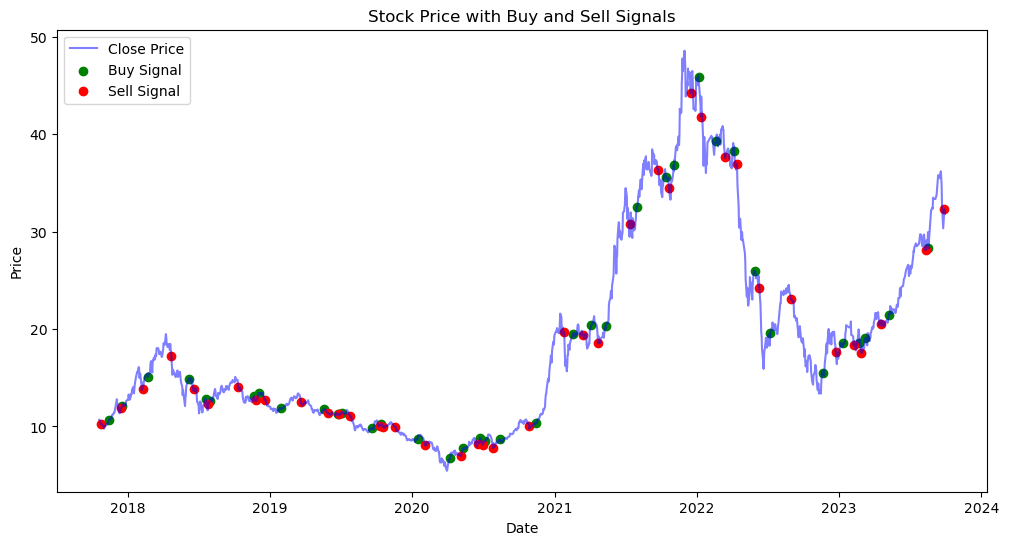

In [12]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df_tb['close'], label='Close Price', color='blue', alpha=0.5)

# Unique labels for legend
buy_label_added = False
sell_label_added = False

# Mark the buy signals
for signal in buy_signals:
    if signal in df_tb.index:
        plt.scatter(signal, df_tb.loc[signal, 'close'], marker='o', color='green', label='Buy Signal' if not buy_label_added else '', alpha=1)
        buy_label_added = True

# Mark the sell signals
for signal in sell_signals:
    if signal in df_tb.index:
        plt.scatter(signal, df_tb.loc[signal, 'close'], marker='o', color='red', label='Sell Signal' if not sell_label_added else '', alpha=1)
        sell_label_added = True

plt.title('Stock Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [14]:
fig = make_subplots(rows=1, cols=1)

# Add the closing price line
fig.add_trace(go.Scatter(
    x=df_tb.index, 
    y=df_tb['close'], 
    mode='lines', 
    name='Close Price', 
    line=dict(color='blue', width=2)))

# Add buy signals - chỉ thêm một dấu hiệu mua để tránh lặp trong chú thích
buy_trace = go.Scatter(
    x=[buy_signals[0]], 
    y=[df_tb.loc[buy_signals[0], 'close']], 
    mode='markers', 
    marker_symbol='triangle-up', 
    marker_color='green', 
    marker_size=10, 
    name='Buy Signal')
fig.add_trace(buy_trace)

# Add all buy signal points
fig.add_trace(go.Scatter(
    x=buy_signals, 
    y=df_tb.loc[buy_signals, 'close'], 
    mode='markers', 
    marker_symbol='triangle-up', 
    marker_color='green', 
    marker_size=10, 
    showlegend=False))

# Add sell signals - chỉ thêm một dấu hiệu bán
sell_trace = go.Scatter(
    x=[sell_signals[0]], 
    y=[df_tb.loc[sell_signals[0], 'close']], 
    mode='markers', 
    marker_symbol='triangle-down', 
    marker_color='red', 
    marker_size=10, 
    name='Sell Signal')
fig.add_trace(sell_trace)

# Add all sell signal points
fig.add_trace(go.Scatter(
    x=sell_signals, 
    y=df_tb.loc[sell_signals, 'close'], 
    mode='markers', 
    marker_symbol='triangle-down', 
    marker_color='red', 
    marker_size=10, 
    showlegend=False))

fig.update_layout(
    title='SSI Price with Buy and Sell Signals',
    xaxis_title='Date',
    yaxis_title='Price',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template='plotly_dark',
    xaxis_rangeslider_visible=False)  # Ẩn range slider để làm sạch biểu đồ

fig.show()

### Back Testing on SSI

In [15]:
!pip install backtesting

In [16]:
print(df_tb.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'symbol', 'MA5', 'MA20'], dtype='object')


In [17]:
df_tb.columns = ['Open', 'High', 'Low', 'Close', 'Volume','Symbol', 'MA5', 'MA20']

In [18]:
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_tb, PrecomputedMACrossover, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

Start                     2017-10-20 00:00:00
End                       2023-09-29 00:00:00
Duration                   2170 days 00:00:00
Exposure Time [%]                   57.073509
Equity Final [$]                 57851.407024
Equity Peak [$]                   63652.80567
Return [%]                          478.51407
Buy & Hold Return [%]              197.752793
Return (Ann.) [%]                   35.900142
Volatility (Ann.) [%]               42.041777
Sharpe Ratio                         0.853916
Sortino Ratio                        1.828179
Calmar Ratio                         0.896856
Max. Drawdown [%]                  -40.028887
Avg. Drawdown [%]                   -7.106656
Max. Drawdown Duration      981 days 00:00:00
Avg. Drawdown Duration       59 days 00:00:00
# Trades                                   38
Win Rate [%]                             50.0
Best Trade [%]                      85.370704
Worst Trade [%]                    -10.042922
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p1309', ...)

### 2. VND

In [19]:
import pandas as pd
df_VND = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/VND_price_for_trading_bot.csv')
df_VND.head()

date  open  high   low  close  volume    MA5    MA20
0  10/26/2017  3.49  3.54  3.40   3.46  322940  3.454  3.5275
1  10/27/2017  3.47  3.47  3.43   3.45  286070  3.444  3.5185
2  10/30/2017  3.45  3.51  3.44   3.44  374290  3.452  3.5115
3  10/31/2017  3.45  3.46  3.30   3.32  387580  3.428  3.5030
4   11/1/2017  3.35  3.35  3.10   3.23  633640  3.380  3.4885

In [20]:
df_VND['date'] = pd.to_datetime(df_VND['date'])

In [21]:
df_VND = df_VND.dropna()

In [22]:
df_VND.shape

(1356, 8)

In [23]:
df_VND.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1356 non-null   datetime64[ns]
 1   open    1356 non-null   float64       
 2   high    1356 non-null   float64       
 3   low     1356 non-null   float64       
 4   close   1356 non-null   float64       
 5   volume  1356 non-null   int64         
 6   MA5     1356 non-null   float64       
 7   MA20    1356 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 95.3 KB


In [24]:
df_VND.set_index('date', inplace=True)

In [25]:
df_VND.head()

open  high   low  close  volume    MA5    MA20
date                                                      
2017-10-26  3.49  3.54  3.40   3.46  322940  3.454  3.5275
2017-10-27  3.47  3.47  3.43   3.45  286070  3.444  3.5185
2017-10-30  3.45  3.51  3.44   3.44  374290  3.452  3.5115
2017-10-31  3.45  3.46  3.30   3.32  387580  3.428  3.5030
2017-11-01  3.35  3.35  3.10   3.23  633640  3.380  3.4885

In [26]:
def trading_strategy_VND(df_VND):
    buy_signals = []
    sell_signals = []
    
    for i in range(1, len(df_VND)):
        if df_VND['MA5'].iloc[i] > df_VND['MA20'].iloc[i] and df_VND['MA5'].iloc[i-1] < df_VND['MA20'].iloc[i-1]:
            buy_signals.append(df_VND.index[i])  
        elif df_VND['MA5'].iloc[i] < df_VND['MA20'].iloc[i] and df_VND['MA5'].iloc[i-1] > df_VND['MA20'].iloc[i-1]:
            sell_signals.append(df_VND.index[i])  
            
    return buy_signals, sell_signals

In [27]:
buy_signals_VND, sell_signals_VND = trading_strategy(df_VND)

In [28]:
print("Buy Signals:")
for signal in buy_signals:
    print(signal)

print("\nSell Signals:")
for signal in sell_signals:
    print(signal)

Buy Signals:
2017-11-14 00:00:00
2017-12-18 00:00:00
2018-02-22 00:00:00
2018-06-06 00:00:00
2018-07-20 00:00:00
2018-07-30 00:00:00
2018-11-21 00:00:00
2018-12-03 00:00:00
2019-01-29 00:00:00
2019-05-20 00:00:00
2019-06-25 00:00:00
2019-07-04 00:00:00
2019-09-19 00:00:00
2019-10-14 00:00:00
2020-01-15 00:00:00
2020-04-08 00:00:00
2020-05-11 00:00:00
2020-06-23 00:00:00
2020-07-07 00:00:00
2020-08-13 00:00:00
2020-11-13 00:00:00
2021-02-18 00:00:00
2021-04-05 00:00:00
2021-05-12 00:00:00
2021-07-30 00:00:00
2021-10-13 00:00:00
2021-11-02 00:00:00
2022-01-05 00:00:00
2022-02-18 00:00:00
2022-04-07 00:00:00
2022-05-30 00:00:00
2022-07-08 00:00:00
2022-11-21 00:00:00
2023-01-12 00:00:00
2023-02-22 00:00:00
2023-03-09 00:00:00
2023-05-09 00:00:00
2023-08-18 00:00:00

Sell Signals:
2017-10-24 00:00:00
2017-12-15 00:00:00
2018-02-08 00:00:00
2018-04-23 00:00:00
2018-06-20 00:00:00
2018-07-27 00:00:00
2018-10-12 00:00:00
2018-11-27 00:00:00
2018-12-19 00:00:00
2019-03-22 00:00:00
2019-05-30 0

In [29]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [30]:
fig = make_subplots(rows=1, cols=1)

# Add the closing price line
fig.add_trace(go.Scatter(
    x=df_VND.index, 
    y=df_VND['close'], 
    mode='lines', 
    name='Close Price', 
    line=dict(color='blue', width=2)))

# Add buy signals - chỉ thêm một dấu hiệu mua để tránh lặp trong chú thích
buy_trace = go.Scatter(
    x=[buy_signals_VND[0]], 
    y=[df_VND.loc[buy_signals_VND[0], 'close']], 
    mode='markers', 
    marker_symbol='triangle-up', 
    marker_color='green', 
    marker_size=10, 
    name='Buy Signal')
fig.add_trace(buy_trace)

# Add all buy signal points
fig.add_trace(go.Scatter(
    x=buy_signals_VND, 
    y=df_VND.loc[buy_signals_VND, 'close'], 
    mode='markers', 
    marker_symbol='triangle-up', 
    marker_color='green', 
    marker_size=10, 
    showlegend=False))

# Add sell signals - chỉ thêm một dấu hiệu bán
sell_trace = go.Scatter(
    x=[sell_signals_VND[0]], 
    y=[df_VND.loc[sell_signals_VND[0], 'close']], 
    mode='markers', 
    marker_symbol='triangle-down', 
    marker_color='red', 
    marker_size=10, 
    name='Sell Signal')
fig.add_trace(sell_trace)

# Add all sell signal points
fig.add_trace(go.Scatter(
    x=sell_signals_VND, 
    y=df_VND.loc[sell_signals_VND, 'close'], 
    mode='markers', 
    marker_symbol='triangle-down', 
    marker_color='red', 
    marker_size=10, 
    showlegend=False))

fig.update_layout(
    title='VNDirect Price with Buy and Sell Signals',
    xaxis_title='Date',
    yaxis_title='Price',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template='plotly_dark',
    xaxis_rangeslider_visible=False)  # Ẩn range slider để làm sạch biểu đồ

fig.show()

### Back Testing on VND

In [31]:
print(df_VND.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'MA5', 'MA20'], dtype='object')


In [32]:
df_VND.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']

In [33]:
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover_VND(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_VND, PrecomputedMACrossover_VND, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

Start                     2017-10-26 00:00:00
End                       2023-09-28 00:00:00
Duration                   2163 days 00:00:00
Exposure Time [%]                   60.029499
Equity Final [$]                171438.170828
Equity Peak [$]                 199483.164824
Return [%]                        1614.381708
Buy & Hold Return [%]              508.381474
Return (Ann.) [%]                   69.569374
Volatility (Ann.) [%]               62.883569
Sharpe Ratio                          1.10632
Sortino Ratio                         3.23388
Calmar Ratio                         1.903831
Max. Drawdown [%]                  -36.541777
Avg. Drawdown [%]                   -5.488186
Max. Drawdown Duration      974 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                   34
Win Rate [%]                        52.941176
Best Trade [%]                     151.762352
Worst Trade [%]                    -12.952997
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p1649', ...)

### 3. Back Testing on HPG

In [34]:
import pandas as pd
df_HPG = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/HPG_price_for_trading_bot.csv')
df_HPG.head()

date  open  high   low  close   volume    MA5    MA20
0  10/20/2017  9.45  9.49  9.23   9.37  5134390  9.534  9.6560
1  10/23/2017  9.28  9.38  9.17   9.28  3548920  9.490  9.6510
2  10/24/2017  9.37  9.38  9.27   9.38  2536880  9.416  9.6525
3  10/25/2017  9.35  9.43  9.34   9.34  1865230  9.364  9.6480
4  10/26/2017  9.34  9.34  9.18   9.25  2990890  9.324  9.6385

In [35]:
df_HPG['date'] = pd.to_datetime(df_HPG['date'])

In [36]:
df_HPG = df_HPG.dropna()

In [37]:
df_HPG.set_index('date', inplace=True)

In [38]:
print(df_HPG.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'MA5', 'MA20'], dtype='object')


In [39]:
df_HPG.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']

In [40]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover_HPG(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_HPG, PrecomputedMACrossover_HPG, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

Start                     2017-10-20 00:00:00
End                       2023-09-29 00:00:00
Duration                   2170 days 00:00:00
Exposure Time [%]                    55.54755
Equity Final [$]                 37172.339311
Equity Peak [$]                  45188.514412
Return [%]                         271.723393
Buy & Hold Return [%]              180.683026
Return (Ann.) [%]                   26.919091
Volatility (Ann.) [%]               33.147377
Sharpe Ratio                         0.812103
Sortino Ratio                        1.602797
Calmar Ratio                         0.739664
Max. Drawdown [%]                  -36.393653
Avg. Drawdown [%]                   -5.000307
Max. Drawdown Duration      979 days 00:00:00
Avg. Drawdown Duration       60 days 00:00:00
# Trades                                   39
Win Rate [%]                        41.025641
Best Trade [%]                      80.548675
Worst Trade [%]                     -9.382627
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p1989', ...)

### 4. Back Testing on MWG

In [41]:
import pandas as pd
df_MWG = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/MWG_price_for_trading_bot.csv')
df_MWG.head()

date       open       high        low      close   volume        MA5  \
0  10/20/2017  31.180000  31.600000  29.850000  29.889999  1759640  30.156000   
1  10/23/2017  29.770000  29.870001  29.420000  29.420000   886300  30.062000   
2  10/24/2017  29.280001  30.010000  29.280001  30.010000   806950  30.080000   
3  10/25/2017  30.240000  30.780001  30.129999  30.780001   586890  30.209999   
4  10/26/2017  31.180000  31.180000  30.129999  30.549999   906180  30.129999   

     MA20  
0  28.430  
1  28.518  
2  28.646  
3  28.837  
4  29.013

In [42]:
df_MWG['date'] = pd.to_datetime(df_MWG['date'])

In [43]:
df_MWG = df_MWG.dropna()

In [44]:
df_MWG.set_index('date', inplace=True)

In [45]:
print(df_MWG.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'MA5', 'MA20'], dtype='object')


In [46]:
df_MWG.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']

In [47]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover_MWG(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_MWG, PrecomputedMACrossover_MWG, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

Start                     2017-10-20 00:00:00
End                       2023-09-29 00:00:00
Duration                   2170 days 00:00:00
Exposure Time [%]                   59.846369
Equity Final [$]                 23948.460973
Equity Peak [$]                  26655.665939
Return [%]                          139.48461
Buy & Hold Return [%]               75.978587
Return (Ann.) [%]                   16.612306
Volatility (Ann.) [%]               30.463512
Sharpe Ratio                         0.545318
Sortino Ratio                         0.96166
Calmar Ratio                         0.668543
Max. Drawdown [%]                  -24.848505
Avg. Drawdown [%]                   -6.335149
Max. Drawdown Duration      586 days 00:00:00
Avg. Drawdown Duration       54 days 00:00:00
# Trades                                   41
Win Rate [%]                        46.341463
Best Trade [%]                      32.294458
Worst Trade [%]                    -12.615134
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p2329', ...)

#### 5. Back Testing on PDR

In [48]:
df_PDR = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/PDR_price_for_trading_bot.csv')
df_PDR.head()

date   open   high    low  close   volume symbol     MA5     MA20
0  10/20/2017  10.27  10.32  10.15  10.21  1416840    PDR  10.122   9.9295
1  10/23/2017  10.18  10.21  10.13  10.15   988510    PDR  10.154   9.9560
2  10/24/2017  10.11  10.27  10.08  10.27  1110080    PDR  10.204   9.9780
3  10/25/2017  10.29  10.34  10.24  10.29   916260    PDR  10.236   9.9990
4  10/26/2017  10.24  10.26  10.18  10.24   806260    PDR  10.232  10.0245

In [49]:
df_PDR['date'] = pd.to_datetime(df_PDR['date'])

In [50]:
df_PDR = df_PDR.dropna()

In [51]:
df_PDR.set_index('date', inplace=True)

In [52]:
print(df_PDR.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'symbol', 'MA5', 'MA20'], dtype='object')


In [53]:
df_PDR = df_PDR.drop(['symbol'], axis=1)

In [54]:
df_PDR.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']

In [103]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover_PDR(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_PDR, PrecomputedMACrossover_PDR, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

Start                     2017-10-20 00:00:00
End                       2023-09-28 00:00:00
Duration                   2169 days 00:00:00
Exposure Time [%]                   56.831395
Equity Final [$]                 27092.983728
Equity Peak [$]                   33257.98436
Return [%]                         170.929837
Buy & Hold Return [%]              131.635647
Return (Ann.) [%]                    20.02541
Volatility (Ann.) [%]               29.538412
Sharpe Ratio                         0.677945
Sortino Ratio                        1.365026
Calmar Ratio                         0.443939
Max. Drawdown [%]                  -45.108512
Avg. Drawdown [%]                   -6.267737
Max. Drawdown Duration     1056 days 00:00:00
Avg. Drawdown Duration       68 days 00:00:00
# Trades                                   49
Win Rate [%]                        34.693878
Best Trade [%]                      56.096205
Worst Trade [%]                    -12.207148
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p3347', ...)

#### Back Testing on Bitcoin

In [56]:
df_BTC = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/Dữ liệu Lịch sử BTC_USD.csv')

In [57]:
df_BTC['date'] = pd.to_datetime(df_BTC['date'], format='%d/%m/%Y')

In [58]:
df_BTC = df_BTC.sort_values(by='date')

In [59]:
df_BTC['close'] = df_BTC['close'].str.replace(',', '').astype(float)

df_BTC['MA5'] = df_BTC['close'].rolling(window=5).mean()
df_BTC['MA20'] = df_BTC['close'].rolling(window=20).mean()

In [60]:
df_BTC = df_BTC.dropna()

In [61]:
df_BTC.set_index('date', inplace=True)

In [62]:
df_BTC

open       high        low    close  volume       MA5  \
date                                                                     
2017-01-20      900.3      904.5      883.3    896.0   9.49K    883.64   
2017-01-21      895.7        931      893.9    924.0  12.17K    902.42   
2017-01-22        924      939.7        892    923.7  21.84K    906.36   
2017-01-23      923.7      928.8        910    910.0   9.63K    910.80   
2017-01-24      908.4        927      884.2    886.1  20.73K    907.96   
...               ...        ...        ...      ...     ...       ...   
2023-11-27  37,443.00  37,547.00  36,735.00  37263.0   1.74K  37494.40   
2023-11-28  37,263.00  38,349.00  36,895.00  37815.0   1.79K  37601.40   
2023-11-29  37,815.00  38,366.00  37,599.00  37834.0   1.19K  37627.40   
2023-11-30  37,834.00  38,136.00  37,490.00  37723.0   0.73K  37615.60   
2023-12-01  37,723.00  38,223.00  37,626.00  38098.0   0.84K  37746.60   

                 MA20  
date                   
2017-01-20    909.780  
2017-01-21    906.030  
2017-01-22    901.250  
2017-01-23    894.875  
2017-01-24    882.200  
...               ...  
2023-11-27  36930.350  
2023-11-28  37039.050  
2023-11-29  37095.800  
2023-11-30  37116.900  
2023-12-01  37164.750  

[2507 rows x 7 columns]

In [63]:
df_BTC.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20']

In [64]:
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'MA5', 'MA20']
for col in columns_to_convert:
    if pd.api.types.is_string_dtype(df_BTC[col]):
        df_BTC[col] = df_BTC[col].str.replace(',', '').astype(float)
    else:
        pass

In [65]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PrecomputedMACrossover_BTC(Strategy):
    def init(self):
        self.ma5 = self.I(lambda x: x, self.data.MA5)
        self.ma20 = self.I(lambda x: x, self.data.MA20)

    def next(self):
        if not self.position and crossover(self.ma5, self.ma20):
            self.buy()
        elif self.position and crossover(self.ma20, self.ma5):
            self.position.close()

bt = Backtest(df_BTC, PrecomputedMACrossover_BTC, cash=10000, commission=.002)

output = bt.run()
print(output)

bt.plot()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19720\256976214.py:15: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).



Start                     2017-01-20 00:00:00
End                       2023-12-01 00:00:00
Duration                   2506 days 00:00:00
Exposure Time [%]                   58.715596
Equity Final [$]                  265856.7202
Equity Peak [$]                   440189.9442
Return [%]                        2558.567202
Buy & Hold Return [%]             4152.008929
Return (Ann.) [%]                    61.21958
Volatility (Ann.) [%]               85.379016
Sharpe Ratio                         0.717033
Sortino Ratio                        1.901223
Calmar Ratio                         0.955433
Max. Drawdown [%]                  -64.075251
Avg. Drawdown [%]                   -9.520149
Max. Drawdown Duration      753 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   69
Win Rate [%]                        31.884058
Best Trade [%]                     119.411331
Worst Trade [%]                    -21.034374
Avg. Trade [%]                    

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\Admin\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



GridPlot(id='p3009', ...)

# Porfolio Optimization

### Modern Porfolio Theory

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta

#### Portfolio of 3 stocks with high risk

In [3]:
df_porfolio_3stocks_highrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_3stocks_highrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [5]:
df_porfolio_3stocks_highrisk = df_porfolio_3stocks_highrisk.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD', 'NKG', 'MWG',], axis=1)

In [6]:
df_porfolio_3stocks_highrisk = df_porfolio_3stocks_highrisk.dropna()
df_porfolio_3stocks_highrisk = df_porfolio_3stocks_highrisk.reset_index()
df_porfolio_3stocks_highrisk = df_porfolio_3stocks_highrisk.drop(['index'], axis=1)
df_porfolio_3stocks_highrisk['date'] = pd.to_datetime(df_porfolio_3stocks_highrisk['date'])

In [7]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_3stocks_highrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [8]:
log_returns = log_returns.dropna()

In [9]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [10]:
tickers = df_porfolio_3stocks_highrisk.columns.drop('date')

In [16]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.2208
VND: 0.4573
HPG: 0.3219
Expected Annual Return: 0.2655
Expected Volatility: 0.3112
Sharpe Ratio: 0.7886


#### Portfolio of 3 stocks with mediuma and low risk

In [14]:
df_porfolio_3stocks_mediumrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')

df_porfolio_3stocks_mediumrisk = df_porfolio_3stocks_mediumrisk.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD', 'NKG', 'MWG',], axis=1)

df_porfolio_3stocks_mediumrisk = df_porfolio_3stocks_mediumrisk.dropna()
df_porfolio_3stocks_mediumrisk = df_porfolio_3stocks_mediumrisk.reset_index()
df_porfolio_3stocks_mediumrisk = df_porfolio_3stocks_mediumrisk.drop(['index'], axis=1)
df_porfolio_3stocks_mediumrisk['date'] = pd.to_datetime(df_porfolio_3stocks_mediumrisk['date'])

# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_3stocks_mediumrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

log_returns = log_returns.dropna()

# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

tickers = df_porfolio_3stocks_mediumrisk.columns.drop('date')

# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.35) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.3000
VND: 0.3500
HPG: 0.3500
Expected Annual Return: 0.2533
Expected Volatility: 0.3026
Sharpe Ratio: 0.7711


#### Portfolio of 3 stocks with low risk

#### Portfolio of 5 stocks with high risk

In [336]:
df_porfolio_optimization = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_optimization.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [337]:
df_porfolio_optimization.isnull().sum()

date      0
SSI      15
VND      56
HPG      37
SJS     243
NKG      30
MWG      23
HCM      20
VGC      15
VNM      28
CTD      31
dtype: int64

In [338]:
df_porfolio_optimization = df_porfolio_optimization.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD'], axis=1)

In [339]:
df_porfolio_optimization = df_porfolio_optimization.dropna()

In [340]:
df_porfolio_optimization = df_porfolio_optimization.reset_index()

In [341]:
df_porfolio_optimization = df_porfolio_optimization.drop(['index'], axis=1)

In [342]:
df_porfolio_optimization['date'] = pd.to_datetime(df_porfolio_optimization['date'])

In [343]:
df_porfolio_optimization.dtypes

date    datetime64[ns]
SSI            float64
VND            float64
HPG            float64
NKG            float64
MWG            float64
dtype: object

In [344]:
df_porfolio_optimization.head()

date    SSI   VND   HPG    NKG        MWG
0 2017-10-20  10.68  3.46  9.37  15.96  29.889999
1 2017-10-23  10.38  3.45  9.28  15.83  29.420000
2 2017-10-24  10.27  3.44  9.38  15.74  30.010000
3 2017-10-25  10.29  3.32  9.34  15.69  30.780001
4 2017-10-26  10.20  3.23  9.25  15.85  30.549999

In [345]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_optimization.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [346]:
log_returns = log_returns.dropna()

In [347]:
log_returns.isnull().sum()

SSI    0
VND    0
HPG    0
NKG    0
MWG    0
dtype: int64

In [348]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
cov_matrix

SSI       VND       HPG       NKG       MWG
SSI  0.200031  0.019659  0.099910  0.113590  0.082678
VND  0.019659  0.261878  0.016466  0.011694  0.005849
HPG  0.099910  0.016466  0.147862  0.126121  0.070809
NKG  0.113590  0.011694  0.126121  0.262883  0.074898
MWG  0.082678  0.005849  0.070809  0.074898  0.141698

In [349]:
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [350]:
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252

In [351]:
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 

In [352]:
# Set the risk free rate 
risk_free_rate = 0.02

In [353]:
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [354]:
tickers = df_porfolio_optimization.columns.drop('date')

In [355]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

In [356]:
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
initial_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [357]:
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

In [358]:
# Get optimal weights 
optimal_weights = optimized_results.x

In [359]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.2110
VND: 0.4587
HPG: 0.3303
NKG: 0.0000
MWG: 0.0000
Expected Annual Return: 0.2730
Expected Volatility: 0.3207
Sharpe Ratio: 0.7888


In [360]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import minimize

num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    all_weights[i, :] = weights
    ret_arr[i] = expected_return(weights, log_returns)
    vol_arr[i] = standard_deviation(weights, cov_matrix)
    sharpe_arr[i] = sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_volatility = vol_arr[max_sharpe_idx]

In [361]:
fig = go.Figure()

# Adjust the colorscale to improve gradient visibility
colorscale = [[0, 'blue'], [0.5, 'green'], [1.0, 'yellow']]

# Add scatter trace for random portfolios with updated marker size and adjust colorbar position
fig.add_trace(go.Scatter(
    x=vol_arr,
    y=ret_arr,
    mode='markers',
    marker=dict(
        size=6,
        color=sharpe_arr,
        colorscale=colorscale,
        colorbar=dict(
            title='Sharpe Ratio',
            xpad=10  # Add padding on the x-axis for the colorbar
        )
    )
))

# Highlight the maximum Sharpe Ratio with a larger, differently colored marker
fig.add_trace(go.Scatter(
    x=[max_sharpe_volatility],
    y=[max_sharpe_return],
    mode='markers+text',
    marker=dict(
        color='red',
        size=12,
        line=dict(width=2, color='DarkSlateGrey')
    ),
    text="Max Sharpe",
    textposition="top center"
))

# Improve the layout
fig.update_layout(
    title='Efficient Frontier',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Expected Return',
    legend_title='Portfolio',
    width=900,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_zeroline=True,
    yaxis_zeroline=True,
    xaxis_zerolinecolor='black',
    yaxis_zerolinecolor='black',
    margin=dict(  # Adjust margins to make sure nothing is clipped
        l=50,
        r=150,  # Increase right margin to prevent colorbar from overlapping
        t=50,
        b=50
    )
)

# Adjust text and hover information
fig.update_traces(
    hoverinfo='text+x+y',
    textposition='bottom center'  # Adjust text position to avoid overlap with colorbar
)

fig.update_traces(marker=dict(colorbar=dict(
    title='Sharpe Ratio',
    x=1.2,  # Adjust this value as needed to move the colorbar to the left
    xpad=10
)))


fig.show()

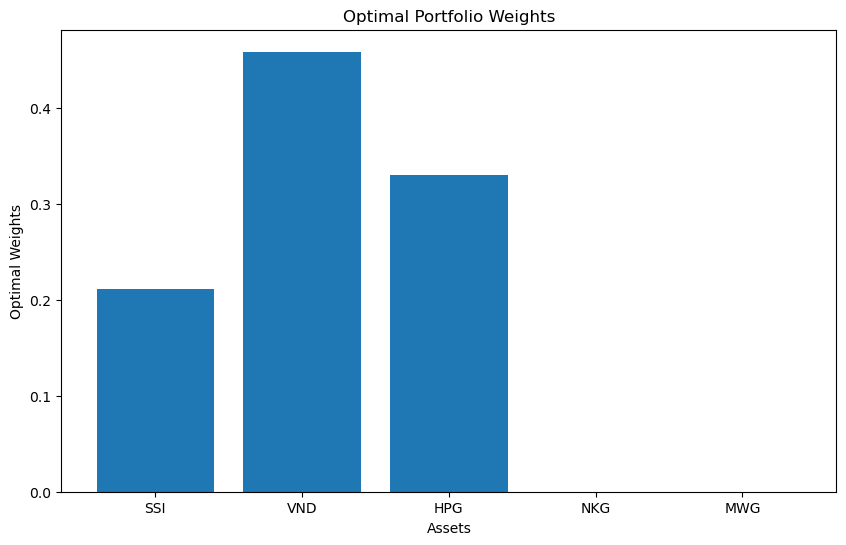

In [362]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

#### Portfolio of 5 stocks with medium risk

In [363]:
df_porfolio_5stocks_mediumrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_5stocks_mediumrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [364]:
df_porfolio_5stocks_mediumrisk = df_porfolio_5stocks_mediumrisk.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD'], axis=1)

In [365]:
df_porfolio_5stocks_mediumrisk = df_porfolio_5stocks_mediumrisk.dropna()
df_porfolio_5stocks_mediumrisk = df_porfolio_5stocks_mediumrisk.reset_index()
df_porfolio_5stocks_mediumrisk = df_porfolio_5stocks_mediumrisk.drop(['index'], axis=1)
df_porfolio_5stocks_mediumrisk['date'] = pd.to_datetime(df_porfolio_5stocks_mediumrisk['date'])

In [366]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_5stocks_mediumrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [367]:
log_returns = log_returns.dropna()

In [368]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [369]:
tickers = df_porfolio_5stocks_mediumrisk.columns.drop('date')

In [370]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.35) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.2631
VND: 0.3500
HPG: 0.3500
NKG: 0.0000
MWG: 0.0369
Expected Annual Return: 0.2564
Expected Volatility: 0.3064
Sharpe Ratio: 0.7717


#### Portfolio of 5 stocks with low risk

In [371]:
df_porfolio_5stocks_lowrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_5stocks_lowrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [372]:
df_porfolio_5stocks_lowrisk.isnull().sum()

date      0
SSI      15
VND      56
HPG      37
SJS     243
NKG      30
MWG      23
HCM      20
VGC      15
VNM      28
CTD      31
dtype: int64

In [373]:
df_porfolio_5stocks_lowrisk = df_porfolio_5stocks_lowrisk.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD'], axis=1)

In [374]:
df_porfolio_5stocks_lowrisk = df_porfolio_5stocks_lowrisk.dropna()
df_porfolio_5stocks_lowrisk = df_porfolio_5stocks_lowrisk.reset_index()
df_porfolio_5stocks_lowrisk = df_porfolio_5stocks_lowrisk.drop(['index'], axis=1)
df_porfolio_5stocks_lowrisk['date'] = pd.to_datetime(df_porfolio_5stocks_lowrisk['date'])

In [375]:
df_porfolio_5stocks_lowrisk.head()

date    SSI   VND   HPG    NKG        MWG
0 2017-10-20  10.68  3.46  9.37  15.96  29.889999
1 2017-10-23  10.38  3.45  9.28  15.83  29.420000
2 2017-10-24  10.27  3.44  9.38  15.74  30.010000
3 2017-10-25  10.29  3.32  9.34  15.69  30.780001
4 2017-10-26  10.20  3.23  9.25  15.85  30.549999

In [376]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_5stocks_lowrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [377]:
log_returns = log_returns.dropna()

In [378]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [379]:
tickers = df_porfolio_5stocks_lowrisk.columns.drop('date')

In [380]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.25) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.2500
VND: 0.2500
HPG: 0.2500
NKG: 0.0000
MWG: 0.2500
Expected Annual Return: 0.2235
Expected Volatility: 0.2896
Sharpe Ratio: 0.7026


#### Portfolio of 10 stocks with high risk

In [381]:
df_porfolio_10stocks_highrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_10stocks_highrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [382]:
df_porfolio_10stocks_highrisk = df_porfolio_10stocks_highrisk.dropna()
df_porfolio_10stocks_highrisk = df_porfolio_10stocks_highrisk.reset_index()
df_porfolio_10stocks_highrisk = df_porfolio_10stocks_highrisk.drop(['index'], axis=1)
df_porfolio_10stocks_highrisk['date'] = pd.to_datetime(df_porfolio_10stocks_highrisk['date'])

In [383]:
df_porfolio_10stocks_highrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0 2017-10-20  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1 2017-10-23  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2 2017-10-24  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3 2017-10-25  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4 2017-10-26  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [384]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_10stocks_highrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [385]:
log_returns = log_returns.dropna()

In [386]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [387]:
tickers = df_porfolio_10stocks_highrisk.columns.drop('date')

In [388]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.1015
VND: 0.3332
HPG: 0.1890
SJS: 0.1378
NKG: 0.0000
MWG: 0.0000
HCM: 0.0000
VGC: 0.2386
VNM: 0.0000
CTD: 0.0000
Expected Annual Return: 0.3060
Expected Volatility: 0.2890
Sharpe Ratio: 0.9895


#### Portfolio of 10 stocks with medium risk

In [389]:
df_porfolio_10stocks_mediumrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_10stocks_mediumrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [390]:
df_porfolio_10stocks_mediumrisk = df_porfolio_10stocks_mediumrisk.dropna()
df_porfolio_10stocks_mediumrisk = df_porfolio_10stocks_mediumrisk.reset_index()
df_porfolio_10stocks_mediumrisk = df_porfolio_10stocks_mediumrisk.drop(['index'], axis=1)
df_porfolio_10stocks_mediumrisk['date'] = pd.to_datetime(df_porfolio_10stocks_mediumrisk['date'])

In [391]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_10stocks_mediumrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

log_returns = log_returns.dropna()

# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

tickers = df_porfolio_10stocks_mediumrisk.columns.drop('date')

# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.3) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.1057
VND: 0.3000
HPG: 0.2000
SJS: 0.1487
NKG: 0.0000
MWG: 0.0000
HCM: 0.0000
VGC: 0.2456
VNM: 0.0000
CTD: 0.0000
Expected Annual Return: 0.3001
Expected Volatility: 0.2837
Sharpe Ratio: 0.9872


#### Portfolio of 10 stocks with low risk

In [392]:
df_porfolio_10stocks_lowrisk = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_10stocks_lowrisk.head()

date    SSI   VND   HPG        SJS    NKG        MWG        HCM  \
0  10/20/2017  10.68  3.46  9.37  25.110001  15.96  29.889999  40.169998   
1  10/23/2017  10.38  3.45  9.28  23.590000  15.83  29.420000  37.770000   
2  10/24/2017  10.27  3.44  9.38  24.150000  15.74  30.010000  38.340000   
3  10/25/2017  10.29  3.32  9.34  24.629999  15.69  30.780001  39.299999   
4  10/26/2017  10.20  3.23  9.25  24.430000  15.85  30.549999  38.540001   

         VGC        VNM         CTD  
0  16.660000  80.940002  142.860001  
1  16.660000  80.660004  138.789993  
2  16.809999  81.209999  140.190002  
3  16.950001  82.029999  140.190002  
4  16.879999  82.730003  140.190002

In [393]:
df_porfolio_10stocks_lowrisk = df_porfolio_10stocks_lowrisk.dropna()
df_porfolio_10stocks_lowrisk = df_porfolio_10stocks_lowrisk.reset_index()
df_porfolio_10stocks_lowrisk = df_porfolio_10stocks_lowrisk.drop(['index'], axis=1)
df_porfolio_10stocks_lowrisk['date'] = pd.to_datetime(df_porfolio_10stocks_lowrisk['date'])

In [394]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_10stocks_lowrisk.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

log_returns = log_returns.dropna()

In [395]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 
# Set the risk free rate 
risk_free_rate = 0.02
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

tickers = df_porfolio_10stocks_lowrisk.columns.drop('date')

# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.2) for _ in range(len(tickers))]
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
# Get optimal weights 
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.1579
VND: 0.2000
HPG: 0.2000
SJS: 0.1978
NKG: 0.0000
MWG: 0.0000
HCM: 0.0000
VGC: 0.2000
VNM: 0.0442
CTD: 0.0000
Expected Annual Return: 0.2704
Expected Volatility: 0.2674
Sharpe Ratio: 0.9367


The formula to calculate the annual return of a portfolio based on the buy/sell signals from the trading bot, combined with the weighting of each stock according to Modern Portfolio Theory:

#### Portfolio Annual Return = (ReturnSSI x WeightSSI) + (ReturnVND x WeightVND) + (ReturnHPG x WeightHPG)

In [396]:
# Annual returns of each stock
annual_return_ssi = 35.90   
annual_return_vnd = 69.57 
annual_return_hpg = 26.92 
# Weights of each stock in the portfolio
weight_ssi = 0.2310
weight_vnd = 0.4000
weight_hpg = 0.3690
# Calculating the weighted average of the portfolio's annual return
portfolio_annual_return = (annual_return_ssi * weight_ssi) + \
                          (annual_return_vnd * weight_vnd) + \
                          (annual_return_hpg * weight_hpg)

In [397]:
portfolio_annual_return

46.05438

#### Calculate annual return of VN-INDEX

In [398]:
import pandas as pd
df_VN_Index_price = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/VN_Index_price_2017_2023.csv')

In [399]:
df_VN_Index_price['date'] = pd.to_datetime(df_VN_Index_price['date'])

In [400]:
df_VN_Index_price = df_VN_Index_price.sort_values(by='date')

In [401]:
df_VN_Index_price = df_VN_Index_price.drop(['Unnamed: 0'], axis=1)

In [402]:
df_VN_Index_price['close'] = df_VN_Index_price['close'].str.replace(',', '').astype(float)

In [403]:
df_VN_Index_price['year'] = df_VN_Index_price['date'].dt.year

# Calculate the first and last close price for each year
annual_first_close = df_VN_Index_price.groupby('year')['close'].first()
annual_last_close = df_VN_Index_price.groupby('year')['close'].last()

# Calculate the annual return of each year
annual_returns = (annual_last_close / annual_first_close - 1) * 100

# Calculate the average annual return of each year
average_annual_return = annual_returns.mean()

print("VN-Index annual return of each year in period 2017-2023:")
print(annual_returns)
print("\nVN-Index average annual return of each year in period 2017-2023:")
print(average_annual_return)

VN-Index annual return of each year in period 2017-2023:
year
2017    46.462106
2018   -10.366852
2019     7.764508
2020    14.193055
2021    33.718886
2022   -33.986418
2023     4.729380
Name: close, dtype: float64

VN-Index average annual return of each year in period 2017-2023:
8.930666383643063
